## Logistic Regression using Python

### In this notebook, we'll implement a logistic regression model to predict the admission of students into a school based on the marks of two tests. Logistic regression is a statistical model that uses a logistic function to model a binary dependent variable. It measures the relationship between the categorical dependent variable and one or more independent variables.

### 1. Importing Required Libraries

#### We start by importing the necessary libraries for handling and analyzing the data, as well as for the logistic regression process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import joblib
import itertools
import subprocess
from time import time
from scipy import stats
import scipy.optimize as opt  
from scipy.stats import chi2_contingency
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

### 2. Importing and Analysing the Data

#### The dataset we're using contains the marks of students in two tests and information on whether or not they were admitted to a school. Let's load the dataset and perform some initial exploration.

In [2]:
# READ DATA
data = pd.read_excel('marks.xlsx', names=['marks1', 'marks2', 'admitted'])

In [3]:
# GETTING THE DIMENSIONS OF THE ARRAY
data.shape

(99, 3)

In [4]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST FIVE ENTRIES OF THE DATA
data.head(10)

,marks1,marks2,admitted
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
5,61.106665,96.511426,1
6,75.024746,46.554014,1
7,76.098787,87.420570,1
8,84.432820,43.533393,1
9,45.450000,35.090000,0


In [5]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
data.tail()

,marks1,marks2,admitted
94,53.84,93.00,1
95,29.57,67.25,0
96,58.58,14.37,1
97,34.65,54.91,1
98,42.82,19.13,1


In [6]:
# COLLECTING INFO ON THE DATA SET
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   marks1    99 non-null     float64
 1   marks2    99 non-null     float64
 2   admitted  99 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


/var/folders/yy/mx9fzt217dqckjcglk6tbfv80000gn/T/ipykernel_75833/1017638797.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax=ax, bins = 30)


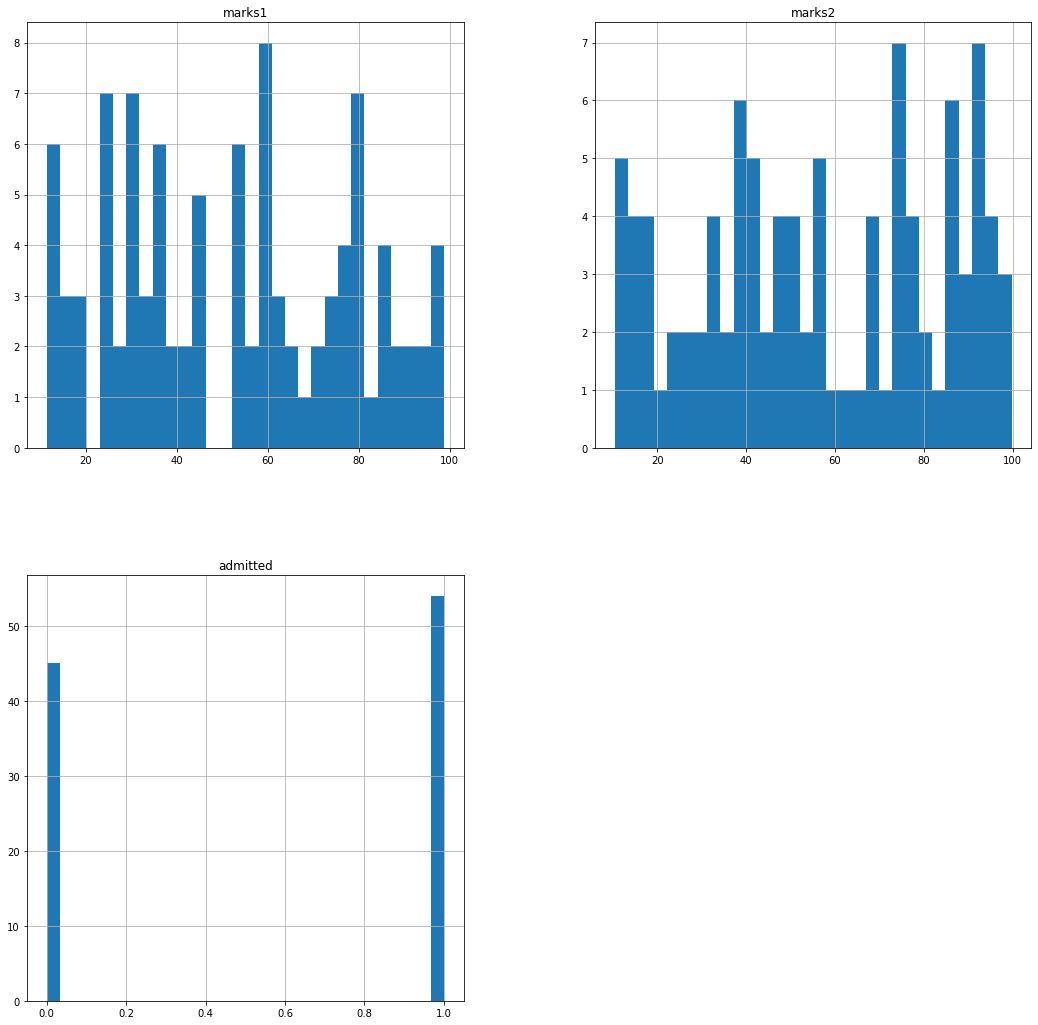

In [7]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
fig = plt.figure(figsize=(18,18))
ax = fig.gca()
data.hist(ax=ax, bins = 30)
plt.show()

In [8]:
#Summary statistics
data.describe()

,marks1,marks2,admitted
count,99.000000,99.000000,99.000000
mean,52.645311,56.513393,0.545455
std,25.709487,27.218410,0.500464
min,11.460000,10.370000,0.000000
25%,30.093356,35.215000,0.000000
50%,53.750000,55.180000,1.000000
75%,76.209394,80.665000,1.000000
max,98.680000,99.680000,1.000000


In [9]:
#checking for null values
data.isnull().sum()

marks1      0
marks2      0
admitted    0
dtype: int64

In [10]:
# CREATING A COPY TO RETAIN THE NUMERICAL INFORMATION OF THE DATA AS WE CHANGE THE 0 AND 1 TO
# 'NOT ADMITTED' AND 'ADMITTED'

###
data1 = data.copy()
###

In [11]:
# RENAMING THE 0 AND I TO
# 'NOT ADMITTED' AND 'ADMITTED' RESPECTIVELY
data1.loc[:, 'admitted'] = data.loc[:, 'admitted'].apply(lambda x: 'admitted' if x == 1 else 'not admitted')

In [12]:
data1.head(20)

,marks1,marks2,admitted
0,30.286711,43.894998,not admitted
1,35.847409,72.902198,not admitted
2,60.182599,86.308552,admitted
3,79.032736,75.344376,admitted
4,45.083277,56.316372,not admitted
5,61.106665,96.511426,admitted
6,75.024746,46.554014,admitted
7,76.098787,87.420570,admitted
8,84.432820,43.533393,admitted
9,45.450000,35.090000,not admitted


<AxesSubplot:>

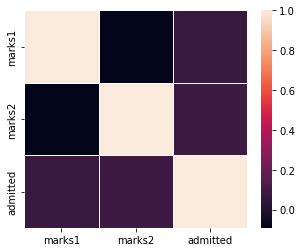

In [13]:
# # calculate the correlation matrix
corr = data.corr()

# plot the heatmap
fig = plt.figure(figsize=(5,4))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            linewidths=.75)

In [14]:
# SETTING THE X VALUES AS THE INPUT PARAMETERS
X = data.iloc[:,:-1]
# SETTING THE CORRESPONDING Y VALUES AS THE LAST COLUMN WHETHER OR NOT THE STUDENT GOT ADMITTED
y = data.iloc[:,-1]

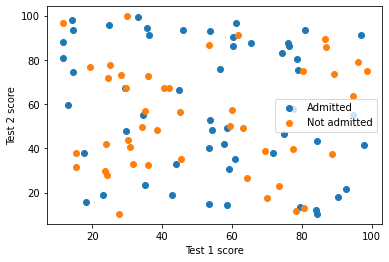

In [15]:
# DO NOT CHANGE ANYTHING, JUST RUN THE CELL
# PLOTTING THE DATA POINTS ON A SCATTER PLOT

mask = y == 1
adm = plt.scatter(X[mask]['marks1'].values, X[mask]['marks2'].values)
not_adm = plt.scatter(X[~mask]['marks1'].values, X[~mask]['marks2'].values)
plt.xlabel('Test 1 score')
plt.ylabel('Test 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

### 3. Logistic Regression for Classification

#### Next, we will define the functions for the logistic regression.

#### First, we define the sigmoid function. It maps any real value into another value between 0 and 1, which is used to convert our real-valued number into a probability that can then be mapped to two or more discrete classes.

#### Sigmoid Function

>>>>>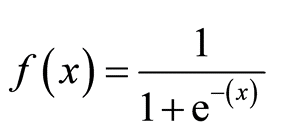

In [16]:
def sigmoid(x):
    ###
    return (1/(1+np.exp(-x)))
    ###

#### Next, we define the cost function. It calculates the error between our model's predictions and the actual values. Our goal is to minimize this cost.

#### Cost function
>>>>>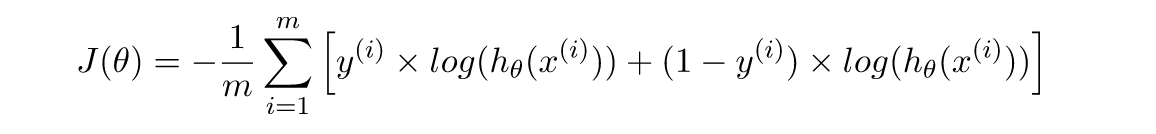

#### We then define the gradient function to update our parameters (theta) iteratively. This function calculates the derivative of the cost function at a particular theta value.

In [17]:
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

#### Updating using gradients
>>>>>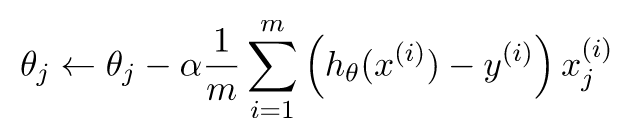

In [18]:
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [19]:
# INITIALIZING THE PARAMETERS
# DO NOT CHANGE, JUST RUN THE CELL

(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]

# intializing theta with all zeros
theta = np.zeros((n+1,1))
J = costFunction(theta, X, y)
print(J)

0.6931471805599454


/var/folders/yy/mx9fzt217dqckjcglk6tbfv80000gn/T/ipykernel_75833/209985319.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [20]:
# FINDING THE OPTIMIZED VALUES OF THETA, I.E. THE PARAMETERS

parameters = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))

parameters = parameters[0]
print(parameters)

[-0.55069418  0.00652422  0.00694051]


  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   2.48795160E+01
    1    3  6.855812564572081E-01   4.11223136E-03
    2    5  6.832859565450601E-01   1.16818448E+00
    3    7  6.826689416685527E-01   2.44083887E-01
    4    9  6.821262673668919E-01   5.48499539E-02
    5   11  6.820301356940802E-01   1.02064445E-03
tnc: fscale = 31.3013
    6   13  6.820298127095243E-01   4.84824303E-06
    7   15  6.820297805926957E-01   6.75753949E-07
tnc: fscale = 1216.48
tnc: |fn-fn-1] = 1.79006e-09 -> convergence
    8   17  6.820297788026380E-01   7.68758926E-08
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [21]:
# FINAL VALUE OF COST AFTER OPTIMIZATION

J = costFunction(parameters[:,np.newaxis], X, y)
print(J)

0.682029778802638


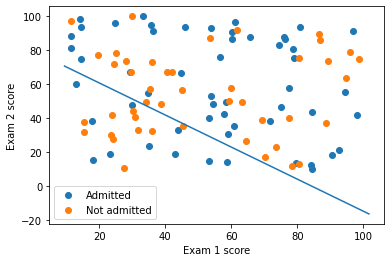

In [22]:
# PLOTTING THE DECISION BOUNDARY THAT SEPERATES THE TWO TYPES OF STUDENTS
# DO NOT CHANGE, JUST RUN THE CELL

plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/parameters[2]*(parameters[0] 
          + np.dot(parameters[1],plot_x))  
mask = (y.flatten() == 1)
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [23]:
# ACCURACY OF PREDICTION COMPARED TO THE ACTUAL VALUES

def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
    
accuracy(X, y.flatten(), parameters, 0.5)

55.55555555555556


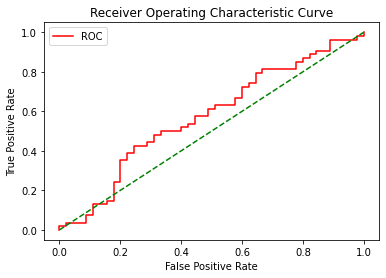

In [24]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

predictions = []
for item in X:
    predictions.append(sigmoid(item @ parameters))
fper, tper, thresholds = roc_curve(y, predictions)
plot_roc_curve(fper, tper)